# Introduction to the Canonical Dataset and what it will be used for

### Canonical Dataset

The canonical dataset is a single, clean time-series used as the development and validation reference for MTS-IE. It serves as the controlled environment in which the full pipeline—data ingestion, regime detection, anomaly detection, forecasting, uncertainty estimation, and scenario simulation—is implemented, debugged, and verified end-to-end.

This dataset is **not** used to train a global model or encode historical knowledge. Instead, it provides a stable sandbox for building and testing system logic before the same stateless engine is applied unchanged to other datasets for validation and robustness checks.


### Why 2021 Abu Dhabi Grand Prix?

The 2021 Abu Dhabi Grand Prix is used as the canonical dataset because it exhibits clear regime shifts, abrupt volatility changes, and decision-critical uncertainty within a short, well-defined time window. These characteristics make it ideal for developing and validating MTS-IE’s core capabilities—regime detection, anomaly detection, and uncertainty-aware simulation—without relying on long historical spans.



In [16]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Reading the csv file 

season_2021 = pd.read_csv("../../Data/Archive/season_2021.csv")
season_2021.tail()

,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,Team,Deleted,Season,Race
23893,HAM,78.003,78.0,3.0,20.193,36.406,21.404,SOFT,Mercedes,False,2021,Monaco
23894,VET,77.071,78.0,2.0,20.335,35.978,20.758,HARD,Aston Martin,False,2021,Monaco
23895,NOR,76.101,78.0,2.0,19.692,35.738,20.671,HARD,McLaren,False,2021,Monaco
23896,PER,75.307,78.0,2.0,19.850,35.110,20.347,HARD,Red Bull Racing,False,2021,Monaco
23897,VER,76.829,78.0,2.0,20.258,35.742,20.829,HARD,Red Bull Racing,False,2021,Monaco


In [18]:
# Copying the Abu Dhabi Grand Prix into a separate dataframe

AD21 = season_2021[season_2021["Race"] == "Abu Dhabi"].copy().reset_index(drop = True)
AD21

,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,Team,Deleted,Season,Race
0,BOT,97.280,1.0,1.0,NaN,39.157,35.555,MEDIUM,Mercedes,False,2021,Abu Dhabi
1,RAI,101.610,1.0,1.0,NaN,40.387,36.246,MEDIUM,Alfa Romeo Racing,False,2021,Abu Dhabi
2,GAS,99.330,1.0,1.0,NaN,39.238,36.292,HARD,AlphaTauri,False,2021,Abu Dhabi
3,TSU,96.600,1.0,1.0,NaN,39.009,34.934,MEDIUM,AlphaTauri,False,2021,Abu Dhabi
4,RUS,102.644,1.0,1.0,NaN,40.204,37.282,MEDIUM,Williams,False,2021,Abu Dhabi
...,...,...,...,...,...,...,...,...,...,...,...,...
972,NOR,86.762,58.0,3.0,17.467,37.799,31.496,MEDIUM,McLaren,False,2021,Abu Dhabi
973,TSU,87.954,58.0,3.0,17.508,38.093,32.353,SOFT,AlphaTauri,False,2021,Abu Dhabi
974,VER,86.618,58.0,4.0,17.476,38.455,30.687,SOFT,Red Bull Racing,False,2021,Abu Dhabi
975,OCO,88.249,58.0,2.0,17.774,37.845,32.630,HARD,Alpine,False,2021,Abu Dhabi


# Time-Series Visualization

Lets look into Sir Lewis Hamilton's lap times first

In [19]:
HAM_time = AD21[AD21["Driver"] == "HAM"].copy().reset_index(drop=True)
HAM_time

,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,Team,Deleted,Season,Race
0,HAM,91.686,1.0,1.0,NaN,38.189,33.146,MEDIUM,Mercedes,False,2021,Abu Dhabi
1,HAM,88.791,2.0,1.0,17.961,38.053,32.777,MEDIUM,Mercedes,False,2021,Abu Dhabi
2,HAM,88.587,3.0,1.0,18.136,37.860,32.591,MEDIUM,Mercedes,False,2021,Abu Dhabi
3,HAM,88.789,4.0,1.0,18.013,38.111,32.665,MEDIUM,Mercedes,False,2021,Abu Dhabi
4,HAM,88.630,5.0,1.0,18.001,38.137,32.492,MEDIUM,Mercedes,False,2021,Abu Dhabi
5,HAM,88.593,6.0,1.0,17.981,38.201,32.411,MEDIUM,Mercedes,False,2021,Abu Dhabi
6,HAM,88.550,7.0,1.0,17.993,38.122,32.435,MEDIUM,Mercedes,False,2021,Abu Dhabi
7,HAM,88.585,8.0,1.0,18.031,38.157,32.397,MEDIUM,Mercedes,False,2021,Abu Dhabi
8,HAM,88.356,9.0,1.0,18.063,38.148,32.145,MEDIUM,Mercedes,False,2021,Abu Dhabi
9,HAM,88.216,10.0,1.0,17.921,38.146,32.149,MEDIUM,Mercedes,False,2021,Abu Dhabi


In [20]:
HAM_time = HAM_time.sort_values("LapNumber").reset_index(drop=True)

## Now lets see Hamilton's lap time versus lap number

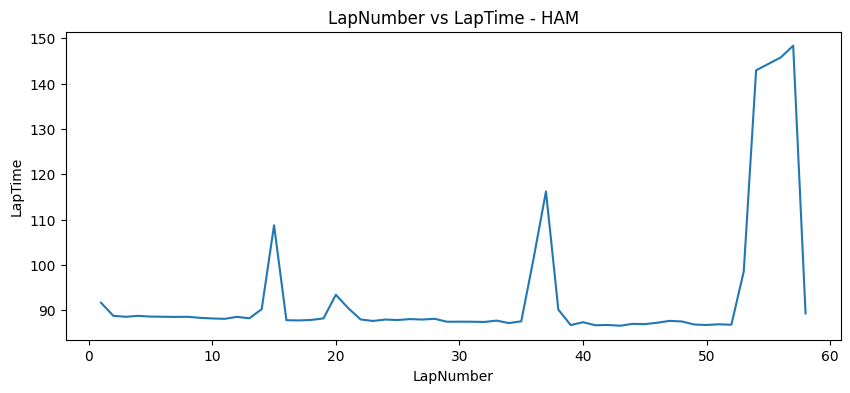

In [21]:
plt.figure(figsize=(10,4))

plt.plot(HAM_time["LapNumber"], HAM_time["LapTime"])
plt.title("LapNumber vs LapTime - HAM")
plt.xlabel("LapNumber")
plt.ylabel("LapTime")

plt.show()

## Rolling mean (Trends)

In [22]:
# Lets start the window with 5 and then progress based on the graphs
window = 5
HAM_time["rolling_mean"] = (HAM_time["LapTime"].rolling(window = window, min_periods=5).mean())
HAM_time

,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,Team,Deleted,Season,Race,rolling_mean
0,HAM,91.686,1.0,1.0,NaN,38.189,33.146,MEDIUM,Mercedes,False,2021,Abu Dhabi,NaN
1,HAM,88.791,2.0,1.0,17.961,38.053,32.777,MEDIUM,Mercedes,False,2021,Abu Dhabi,NaN
2,HAM,88.587,3.0,1.0,18.136,37.860,32.591,MEDIUM,Mercedes,False,2021,Abu Dhabi,NaN
3,HAM,88.789,4.0,1.0,18.013,38.111,32.665,MEDIUM,Mercedes,False,2021,Abu Dhabi,NaN
4,HAM,88.630,5.0,1.0,18.001,38.137,32.492,MEDIUM,Mercedes,False,2021,Abu Dhabi,89.2966
5,HAM,88.593,6.0,1.0,17.981,38.201,32.411,MEDIUM,Mercedes,False,2021,Abu Dhabi,88.6780
6,HAM,88.550,7.0,1.0,17.993,38.122,32.435,MEDIUM,Mercedes,False,2021,Abu Dhabi,88.6298
7,HAM,88.585,8.0,1.0,18.031,38.157,32.397,MEDIUM,Mercedes,False,2021,Abu Dhabi,88.6294
8,HAM,88.356,9.0,1.0,18.063,38.148,32.145,MEDIUM,Mercedes,False,2021,Abu Dhabi,88.5428
9,HAM,88.216,10.0,1.0,17.921,38.146,32.149,MEDIUM,Mercedes,False,2021,Abu Dhabi,88.4600


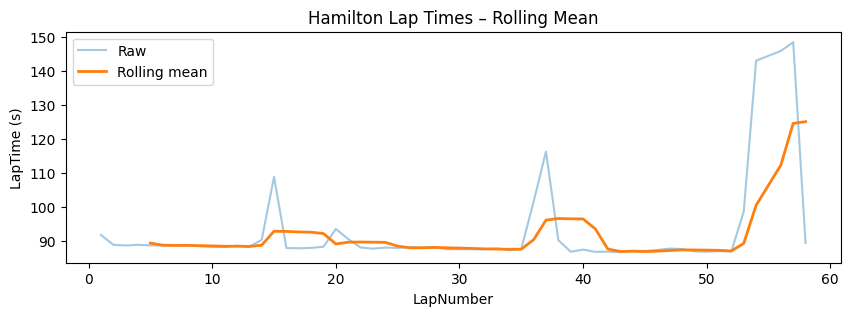

In [23]:
plt.figure(figsize=(10,3))
plt.plot(HAM_time["LapNumber"],HAM_time["LapTime"],
alpha=0.4,
label="Raw"
)

plt.plot(HAM_time["LapNumber"], HAM_time["rolling_mean"],
linewidth = 2,
label="Rolling mean"
)

plt.xlabel("LapNumber")
plt.ylabel("LapTime (s)")
plt.title("Hamilton Lap Times – Rolling Mean")
plt.legend()

plt.show()


## Rolling Variance (Volatility)

In [24]:
HAM_time["rolling_variance"] = HAM_time["LapTime"].rolling(window = window, min_periods=5).var()

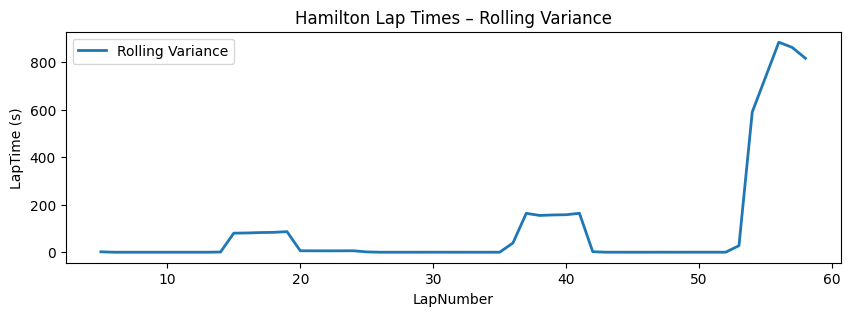

In [25]:
plt.figure(figsize=(10,3))


plt.plot(HAM_time["LapNumber"], HAM_time["rolling_variance"],
linewidth = 2,
label="Rolling Variance"
)

plt.xlabel("LapNumber")
plt.ylabel("LapTime (s)")
plt.title("Hamilton Lap Times – Rolling Variance")
plt.legend()

plt.show()


# Saving the Dataframe as a Canonical CSV file

In [26]:
HAM_time = HAM_time.drop_duplicates(subset="LapNumber")
HAM_time.to_csv("../../Data/Canonical/lewisHamilton_AbuDhabi_2021.csv", index=False)